### Peer Graded Assignment: Course Project 2

In [4]:
setwd('/Users/lauraochoa/Documents/Coursera/4_exploratorydataanalysis/homework2')

## This first line will likely take a few seconds. Be patient!
NEI <- readRDS('exdata%2Fdata%2FNEI_data/summarySCC_PM25.rds')
SCC <- readRDS('exdata%2Fdata%2FNEI_data/Source_Classification_Code.rds')

**PM2.5 Emissions Data (𝚜𝚞𝚖𝚖𝚊𝚛𝚢𝚂𝙲𝙲_𝙿𝙼𝟸𝟻.𝚛𝚍𝚜)**: This file contains a data frame with all of the PM2.5 emissions data for 1999, 2002, 2005, and 2008. For each year, the table contains number of tons of PM2.5 emitted from a specific type of source for the entire year.

- **𝚏𝚒𝚙𝚜**: A five-digit number (represented as a string) indicating the U.S. county
- **𝚂𝙲𝙲**: The name of the source as indicated by a digit string (see source code classification table)
- **𝙿𝚘𝚕𝚕𝚞𝚝𝚊𝚗𝚝**: A string indicating the pollutant
- **𝙴𝚖𝚒𝚜𝚜𝚒𝚘𝚗𝚜**: Amount of PM2.5 emitted, in tons
- **𝚝𝚢𝚙𝚎**: The type of source (point, non-point, on-road, or non-road)
- **𝚢𝚎𝚊𝚛**: The year of emissions recorded


In [286]:
head(NEI)

,fips,SCC,Pollutant,Emissions,type,year
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.490,POINT,1999


**Source Classification Code Table (𝚂𝚘𝚞𝚛𝚌𝚎_𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚌𝚊𝚝𝚒𝚘𝚗_𝙲𝚘𝚍𝚎.𝚛𝚍𝚜)**: This table provides a mapping from the SCC digit strings in the Emissions table to the actual name of the PM2.5 source. The sources are categorized in a few different ways from more general to more specific and you may choose to explore whatever categories you think are most useful. For example, source “10100101” is known as “Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal”.

In [4]:
head(SCC)

SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NA,NA,,,
10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NA,NA,,,
10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Wet Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NA,NA,,,
10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NA,NA,,,
10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclone Furnace,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NA,NA,,,
10100204,Point,Ext Comb /Electric Gen /Bituminous Coal /Spreader Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Spreader Stoker (Bituminous Coal),NA,NA,,,


#### Question 1
Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

quartz_off_screen 
                3

pdf 
  2

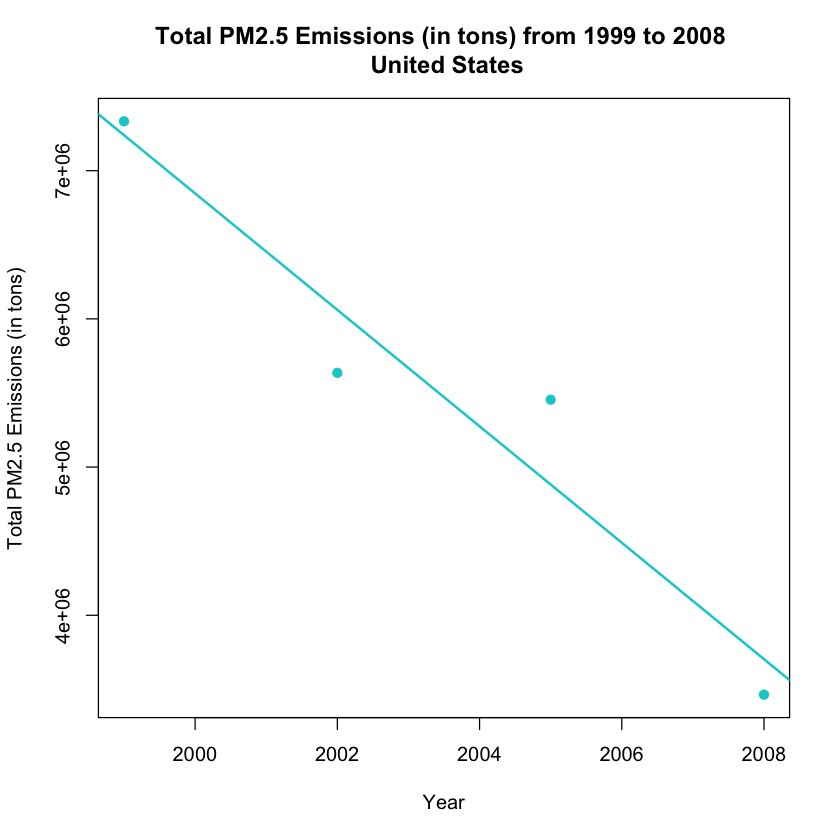

In [323]:
# import dplyr to manipulate data
library(dplyr)
NEItab <- tbl_df(NEI)
#rm("NEI")

# Group by year and sum emissions to get the total emissions
by_year <- group_by(NEItab, year)
totEmissions <- summarize(by_year, sum(Emissions))
colnames(totEmissions)[2] <- "sumEmissions"

# Plot the total emissions (specify tons)
plot(totEmissions, col= "darkturquoise", xlab = "Year", ylab = "Total PM2.5 Emissions (in tons)",
    main="Total PM2.5 Emissions (in tons) from 1999 to 2008 \n United States", pch = 19)
fit <- lm(sumEmissions~year, totEmissions)
abline(fit, lwd = 2, col = "darkturquoise")

# Copy my plot to a PNG file
dev.copy(png, file = "plot1.png", width=480, height=480)

## Close the PNG device!
dev.off()

#### Question 2
Have total emissions from PM2.5 decreased in the **Baltimore City, Maryland (𝚏𝚒𝚙𝚜 == "𝟸𝟺𝟻𝟷𝟶")** from 1999 to 2008? Use the base plotting system to make a plot answering this question.

quartz_off_screen 
                3

pdf 
  2

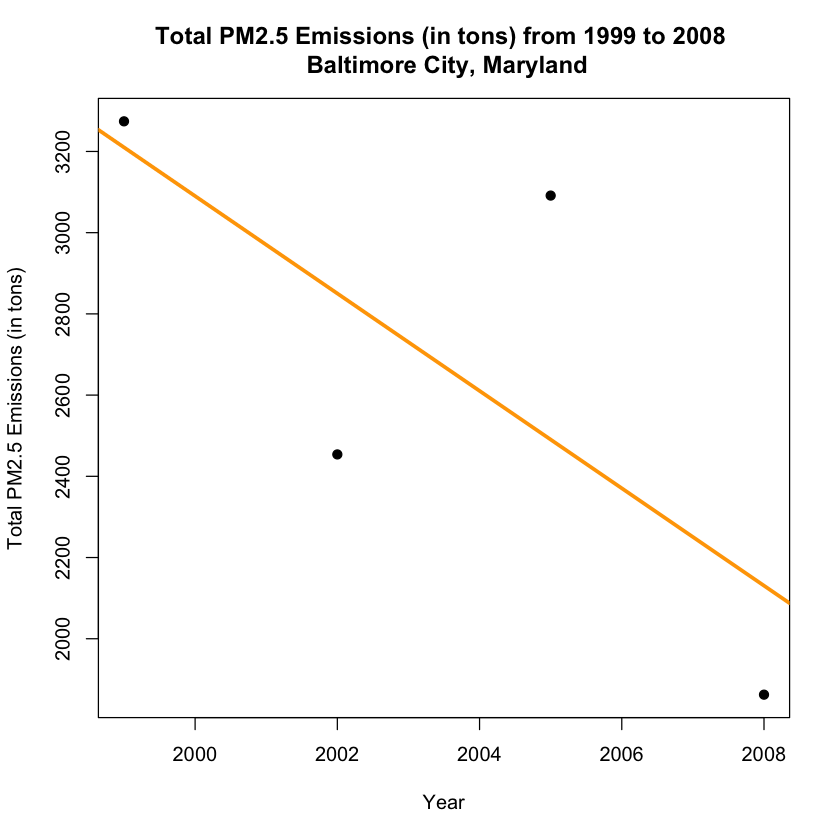

In [326]:
setwd('/Users/lauraochoa/Documents/Coursera/4_exploratorydataanalysis/homework2')

# Read data
NEI <- readRDS('exdata%2Fdata%2FNEI_data/summarySCC_PM25.rds')

# import dplyr to manipulate data
library(dplyr)
NEItab <- tbl_df(NEI)
rm("NEI")

# Select Baltimore Data
baltimore <- filter(NEItab, fips == "24510")

# Group by year and sum emissions to get the total emissions
baltimore_by_year <- group_by(baltimore, year)
baltimore_totEmissions <- summarize(baltimore_by_year, sum(Emissions))
colnames(baltimore_totEmissions)[2] <- "sumEmissions"

# Plot the total emissions (specify tons)
plot(baltimore_totEmissions, xlab = "Year", ylab = "Total PM2.5 Emissions (in tons)",
    main="Total PM2.5 Emissions (in tons) from 1999 to 2008 \n Baltimore City, Maryland", 
     pch = 19)
fit <- lm(sumEmissions~year, baltimore_totEmissions)
abline(fit, lwd = 3, col = "orange")

# Copy my plot to a PNG file
dev.copy(png, file = "plot2.png", width=480, height=480)

## Close the PNG device!
dev.off()

#### Question 3

Of the four types of sources indicated by the **𝚝𝚢𝚙𝚎 (point, nonpoint, onroad, nonroad) variable**, which of these four sources have seen **decreases in emissions** from 1999–2008 for Baltimore City? Which have seen **increases in emissions** from 1999–2008? Use the ggplot2 plotting system to make a plot answer this question.

quartz_off_screen 
                3

pdf 
  2

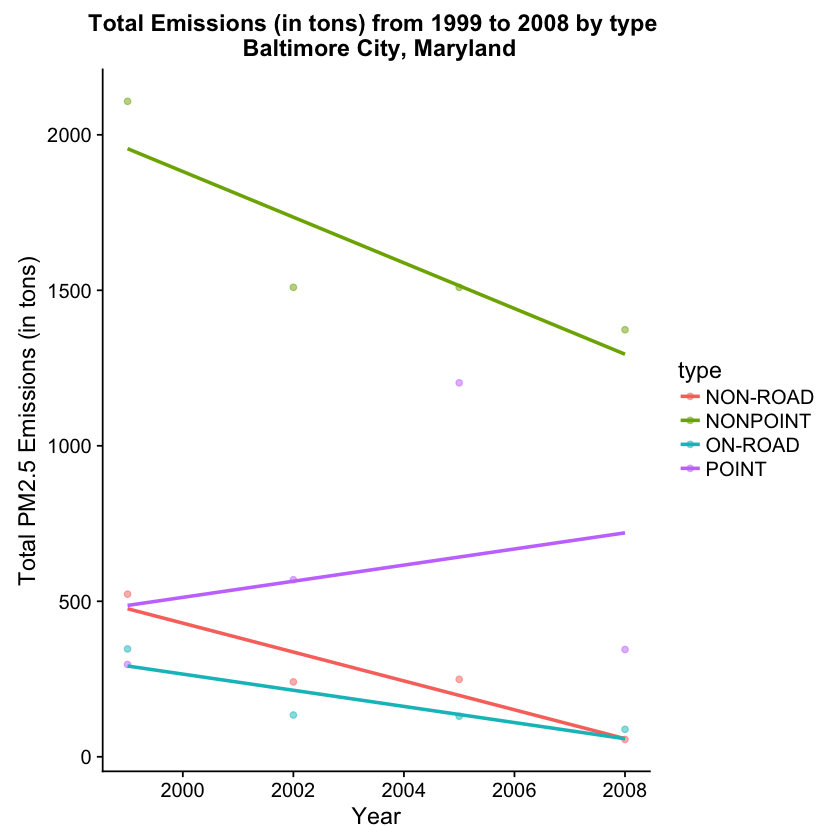

In [343]:
library(ggplot2)

setwd('/Users/lauraochoa/Documents/Coursera/4_exploratorydataanalysis/homework2')

# Read data
#NEI <- readRDS('exdata%2Fdata%2FNEI_data/summarySCC_PM25.rds')

# import dplyr to manipulate data
library(dplyr)
NEItab <- tbl_df(NEI)
rm("NEI")

# Select Baltimore Data
baltimore <- filter(NEItab, fips == "24510")

# Group by type and year
baltimore_by_type <- group_by(baltimore, year, type)
baltimore_by_type_tot <- summarize(balt_byyear_bytype, sum(Emissions))

colnames(baltimore_by_type_tot)[3] <- "sumEmissions"
#with(baltimore_by_type_tot, qplot(year,sumEmissions,col=type)) + 
#geom_smooth(method="lm",se=FALSE) +
#labs(x = "Year", y = "Total PM2.5 Emissions (in tons)", 
#     title="Total Emissions (in tons) from 1999 to 2008 by type \n Baltimore City, Maryland")

g_total <- ggplot(baltimore_by_type_tot, aes(year,sumEmissions)) + geom_point(aes(color=type), alpha=0.5) + geom_smooth(method="lm", se=FALSE, aes(col=type)) +
labs(x = "Year", y = "Total PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) from 1999 to 2008 by type \n Baltimore City, Maryland")

g_total

# Copy my plot to a PNG file
dev.copy(png, file = "plot3.png", width=480, height=480)

## Close the PNG device!
dev.off()

quartz_off_screen 
                3

pdf 
  2

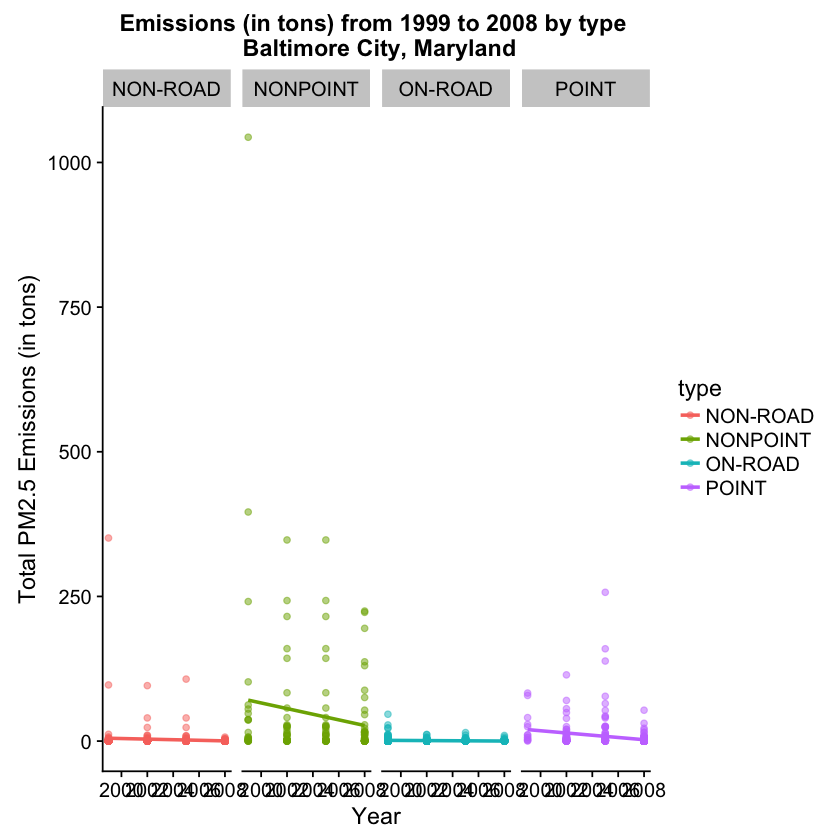

In [340]:
# non-road
library(ggplot2)
g <- ggplot(baltimore_by_type, aes(year,Emissions))
g + geom_point(aes(color=type), alpha=0.5) + facet_grid(. ~ type) + geom_smooth(method="lm", se=FALSE, aes(col=type)) + labs(x = "Year", y = "Total PM2.5 Emissions (in tons)", 
     title="Emissions (in tons) from 1999 to 2008 by type \n Baltimore City, Maryland")

# Copy my plot to a PNG file
dev.copy(png, file = "plot3b.png", width=480, height=480)

## Close the PNG device!
dev.off()

#### Question 4

Across the United States, how have emissions from **coal combustion-related sources** changed from 1999–2008?

Warning message:
“Column `SCC` joining character vector and factor, coercing into character vector”

quartz_off_screen 
                3

pdf 
  2

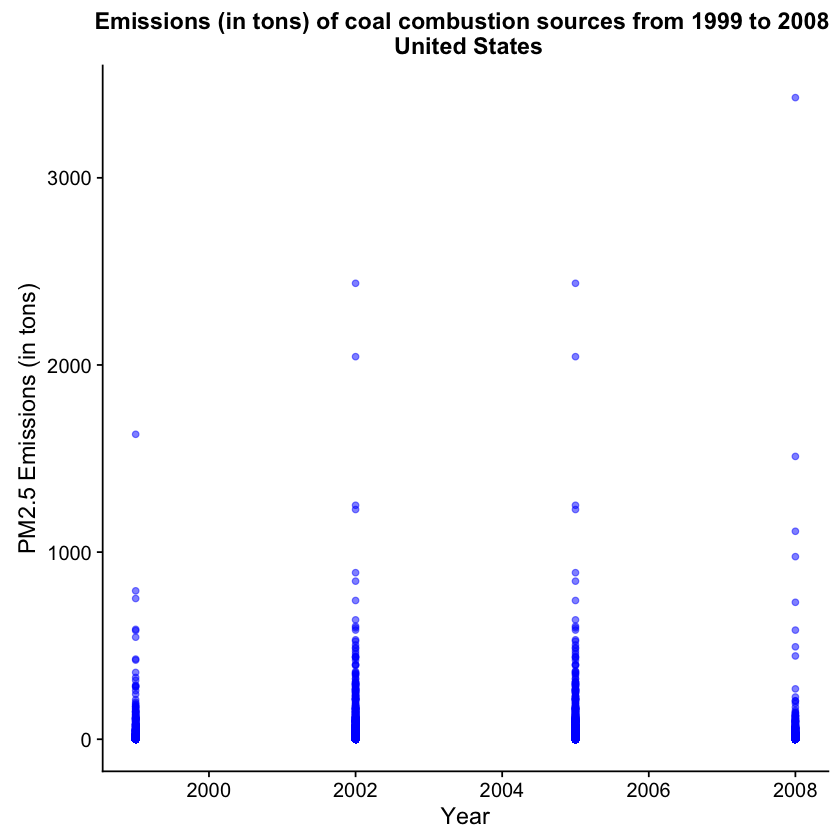

In [353]:
setwd('/Users/lauraochoa/Documents/Coursera/4_exploratorydataanalysis/homework2')

# Read data
NEI <- readRDS('exdata%2Fdata%2FNEI_data/summarySCC_PM25.rds')
SCC <- readRDS('exdata%2Fdata%2FNEI_data/Source_Classification_Code.rds')

# import dplyr to manipulate data
library(dplyr)
NEItab <- tbl_df(NEI)
SCCtab <- tbl_df(SCC)
rm("NEI")
rm("SCC")

# Get SCC codes of coal combustion-related sources
coalSCC <- select(filter(SCCtab, EI.Sector == "Fuel Comb - Comm/Institutional - Coal" | EI.Sector == "Fuel Comb - Electric Generation - Coal " | EI.Sector == "Fuel Comb - Industrial Boilers, ICEs - Coal"),SCC)

# Get only emissions with those SCC codes of coal combustion-related sources
coalNEI <- inner_join(NEItab, coalSCC, by = "SCC")
coalNEI_by_year <- group_by(coalNEI, year)

# Load ggplot2 and plot emissions of baltimore
library(ggplot2)
g <- ggplot(coalNEI_by_year, aes(year,Emissions))
g + geom_point(color="blue", alpha=0.5) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Emissions (in tons) of coal combustion sources from 1999 to 2008 \n United States")

# Copy my plot to a PNG file
dev.copy(png, file = "plot4.png", width=480, height=480)

## Close the PNG device!
dev.off()

quartz_off_screen 
                3

pdf 
  2

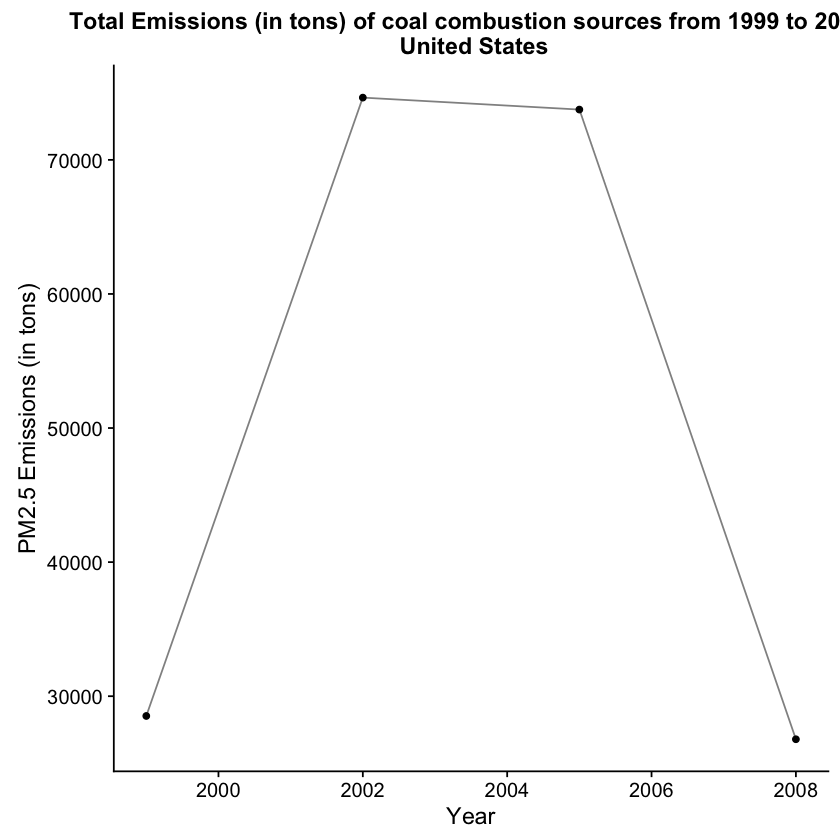

In [351]:
# Group by year and sum emissions to get the total emissions
coal_totEmissions <- summarize(coalNEI_by_year, sum(Emissions))
colnames(coal_totEmissions)[2] <- "sumEmissions"

g <- ggplot(coal_totEmissions, aes(year,sumEmissions))
g + geom_point() + geom_line(alpha=0.5) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) of coal combustion sources from 1999 to 2008 \n United States")

# Copy my plot to a PNG file
dev.copy(png, file = "plot4b.png", width=480, height=480)

## Close the PNG device!
dev.off()

#### Question 5

How have emissions from **motor vehicle sources** changed from 1999–2008 in **Baltimore City**?

Warning message:
“Column `SCC` joining character vector and factor, coercing into character vector”

quartz_off_screen 
                3

pdf 
  2

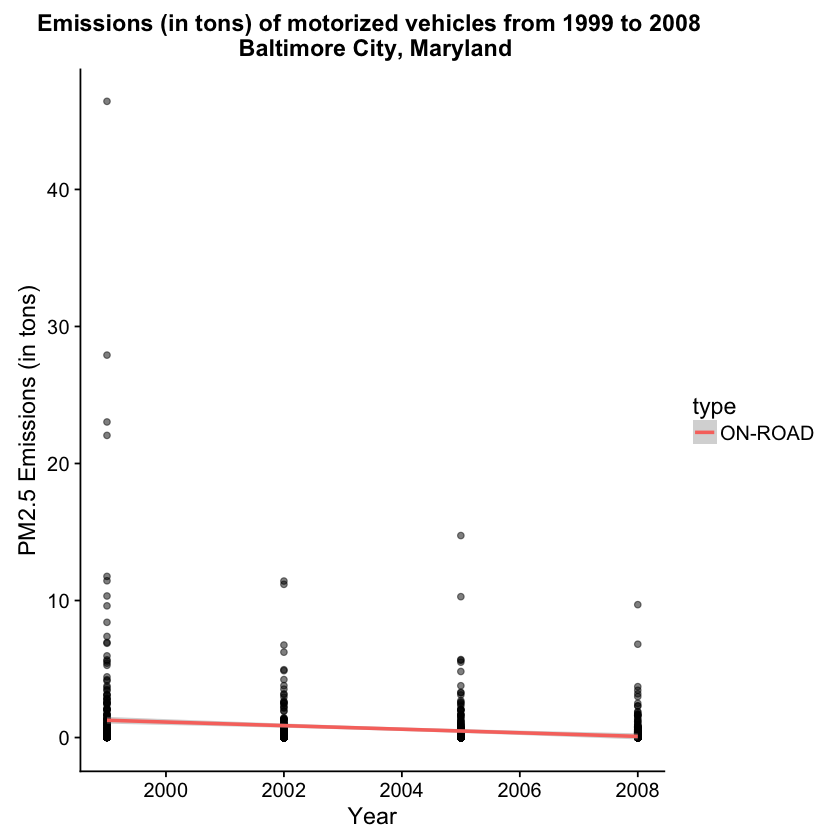

In [359]:
#setwd('/Users/lauraochoa/Documents/Coursera/4_exploratorydataanalysis/homework2')

# Read data
#NEI <- readRDS('exdata%2Fdata%2FNEI_data/summarySCC_PM25.rds')
#SCC <- readRDS('exdata%2Fdata%2FNEI_data/Source_Classification_Code.rds')

# import dplyr to manipulate data
#library(dplyr)
#NEItab <- tbl_df(NEI)
#SCCtab <- tbl_df(SCC)
#rm("NEI")
#rm("SCC")

# Select Baltimore Data
baltimore <- filter(NEItab, fips == "24510")

# Get SCC codes of motor vehicles
motorSCC <- select(filter(SCCtab, SCC.Level.Two == "Highway Vehicles - Diesel" | SCC.Level.Two == "Highway Vehicles - Gasoline"),SCC)

# Get only emissions with those SCC codes of motor vehicles in baltimore
baltimoremotorNEI <- inner_join(baltimore, motorSCC, by = "SCC")
baltimoremotorNEI_by_year <- group_by(baltimoremotorNEI, year)

# Load ggplot2 and plot emissions of baltimore
library(ggplot2)
g <- ggplot(baltimoremotorNEI_by_year, aes(year,Emissions))
g + geom_point(alpha=0.5) + geom_smooth(method="lm", aes(col=type)) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Emissions (in tons) of motorized vehicles from 1999 to 2008 \n Baltimore City, Maryland")

# Copy my plot to a PNG file
dev.copy(png, file = "plot5.png", width=480, height=480)

## Close the PNG device!
dev.off()

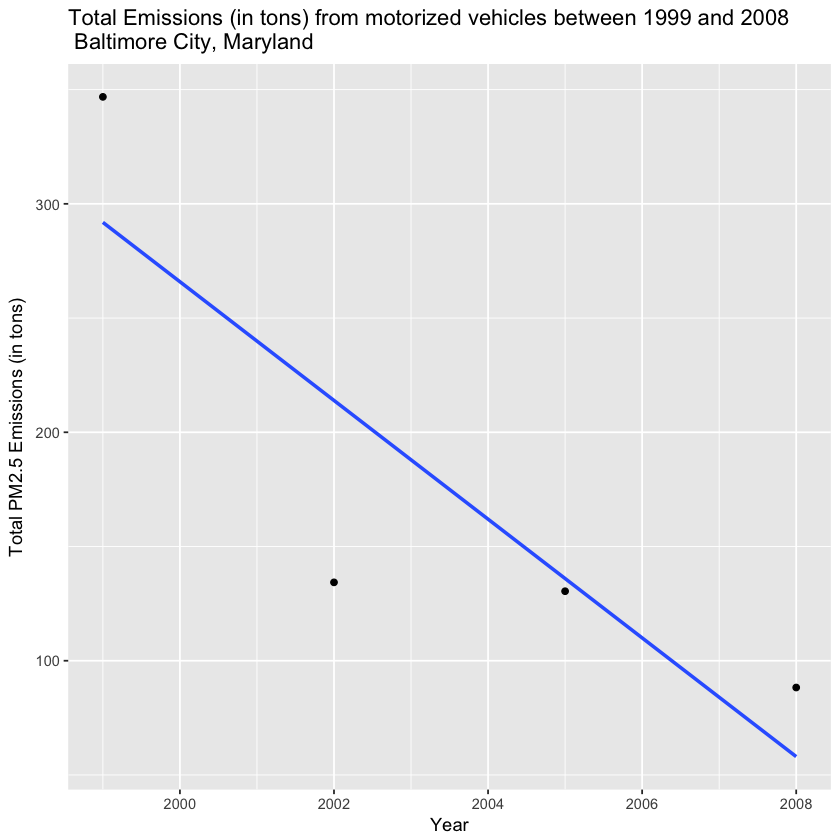

In [235]:
# Group by year and sum emissions to get the total emissions
motor_baltimore_totEmissions <- summarize(baltimoremotorNEI_by_year, sum(Emissions))
colnames(motor_baltimore_totEmissions)[2] <- "sumEmissions"

with(motor_baltimore_totEmissions, qplot(year,sumEmissions)) +
geom_smooth(method="lm",se=FALSE) +
labs(x = "Year", y = "Total PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) from motorized vehicles between 1999 and 2008  \n Baltimore City, Maryland")

# Copy my plot to a PNG file
dev.copy(png, file = "plot5b.png", width=480, height=480)

## Close the PNG device!
dev.off()

#### Question 6

Compare emissions from **motor vehicle sources** in **Baltimore City** with emissions from motor vehicle sources in **Los Angeles County, California (𝚏𝚒𝚙𝚜 == "𝟶𝟼𝟶𝟹𝟽")**. Which city has seen greater changes over time in motor vehicle emissions?

Warning message:
“Column `SCC` joining character vector and factor, coercing into character vector”Warning message:
“Column `SCC` joining character vector and factor, coercing into character vector”

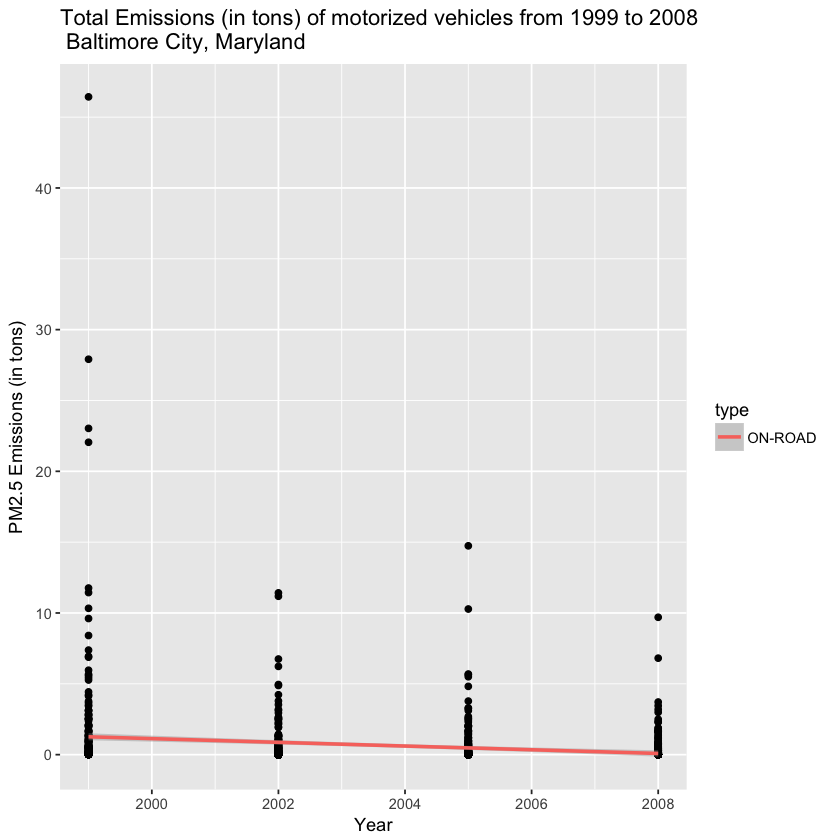

quartz_off_screen 
                3

pdf 
  2

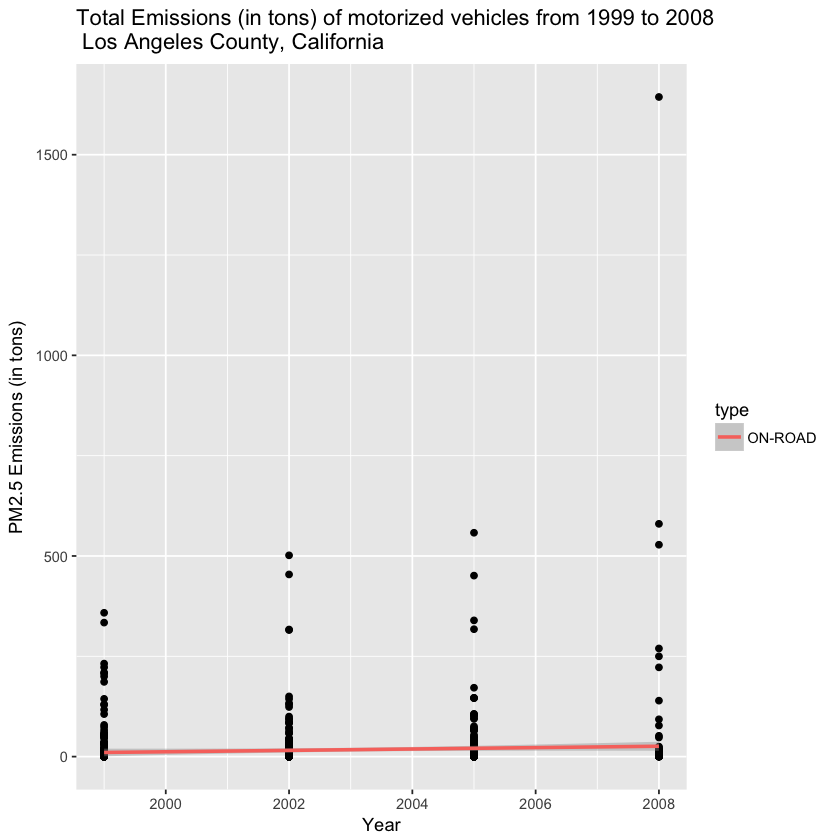

In [327]:
# Select Baltimore and LA Data
baltimore <- filter(NEItab, fips == "24510")
losangeles <- filter(NEItab, fips == "06037")

# Convert to use dplyr and filter the motor vehicle sources
SCCtab <- tbl_df(SCC)
motorvehicles <- filter(SCCtab, SCC.Level.Two == "Highway Vehicles - Diesel" | SCC.Level.Two == "Highway Vehicles - Gasoline")

# Get SCC codes of motor vehicle sources
motorSCC <- select(filter(motorvehicles, Data.Category == "Onroad"),SCC)

# Get only emissions with those SCC codes of motor vehicles
baltimoremotorNEI <- inner_join(baltimore, motorSCC, by = "SCC")
baltimoremotorNEI_by_year <- group_by(baltimoremotorNEI, year)

losangelesmotorNEI <- inner_join(losangeles, motorSCC, by = "SCC")
losangelesmotorNEI_by_year <- group_by(losangelesmotorNEI, year)

# Load ggplot2 and plot emissions of baltimore
library(ggplot2)
par(mfrow=c(2,2))
g <- ggplot(baltimoremotorNEI_by_year, aes(year,Emissions))
g + geom_point() + geom_smooth(method="lm", aes(col=type)) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) of motorized vehicles from 1999 to 2008 \n Baltimore City, Maryland")

g <- ggplot(losangelesmotorNEI_by_year, aes(year,Emissions))
g + geom_point() + geom_smooth(method="lm", aes(col=type)) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) of motorized vehicles from 1999 to 2008 \n Los Angeles County, California")

# Copy my plot to a PNG file
dev.copy(png, file = "plot6a.png", width=480, height=480)

## Close the PNG device!
dev.off()

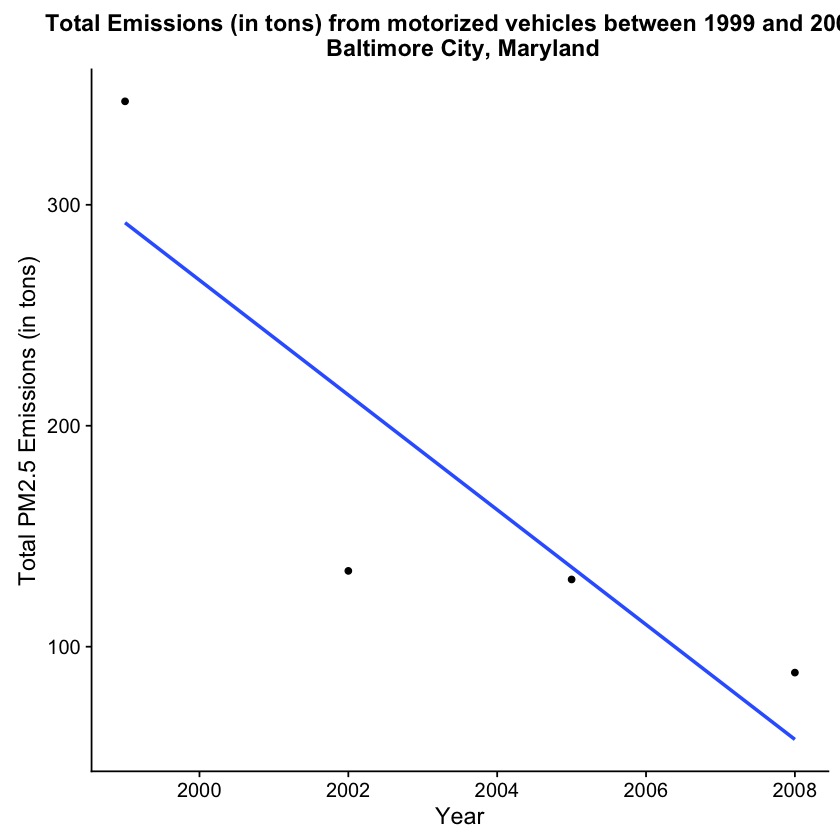

quartz_off_screen 
                3

pdf 
  2

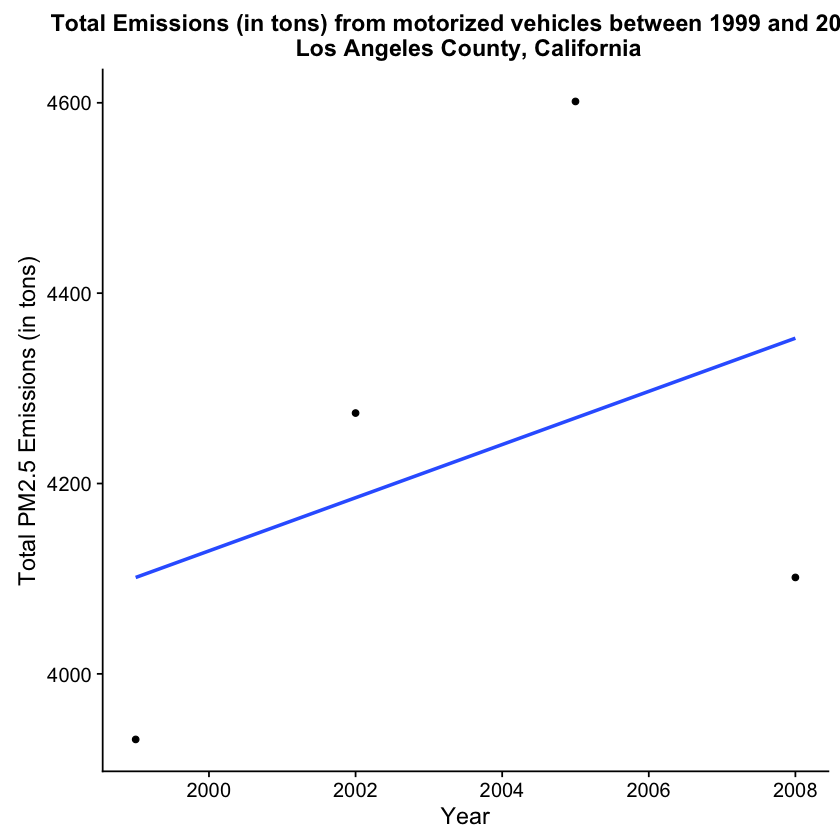

In [360]:
# Group by year and sum emissions to get the total emissions

motor_baltimore_totEmissions <- summarize(baltimoremotorNEI_by_year, sum(Emissions))
colnames(motor_baltimore_totEmissions)[2] <- "sumEmissions"

with(motor_baltimore_totEmissions, qplot(year,sumEmissions)) +
geom_smooth(method="lm",se=FALSE) +
labs(x = "Year", y = "Total PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) from motorized vehicles between 1999 and 2008  \n Baltimore City, Maryland")

motor_losangeles_totEmissions <- summarize(losangelesmotorNEI_by_year, sum(Emissions))
colnames(motor_losangeles_totEmissions)[2] <- "sumEmissions"

with(motor_losangeles_totEmissions, qplot(year,sumEmissions)) +
geom_smooth(method="lm",se=FALSE) +
labs(x = "Year", y = "Total PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) from motorized vehicles between 1999 and 2008  \n Los Angeles County, California")

# Copy my plot to a PNG file
dev.copy(png, file = "plot6b.png", width=480, height=480)

## Close the PNG device!
dev.off()

Warning message:
“Column `SCC` joining character vector and factor, coercing into character vector”

quartz_off_screen 
                3

pdf 
  2

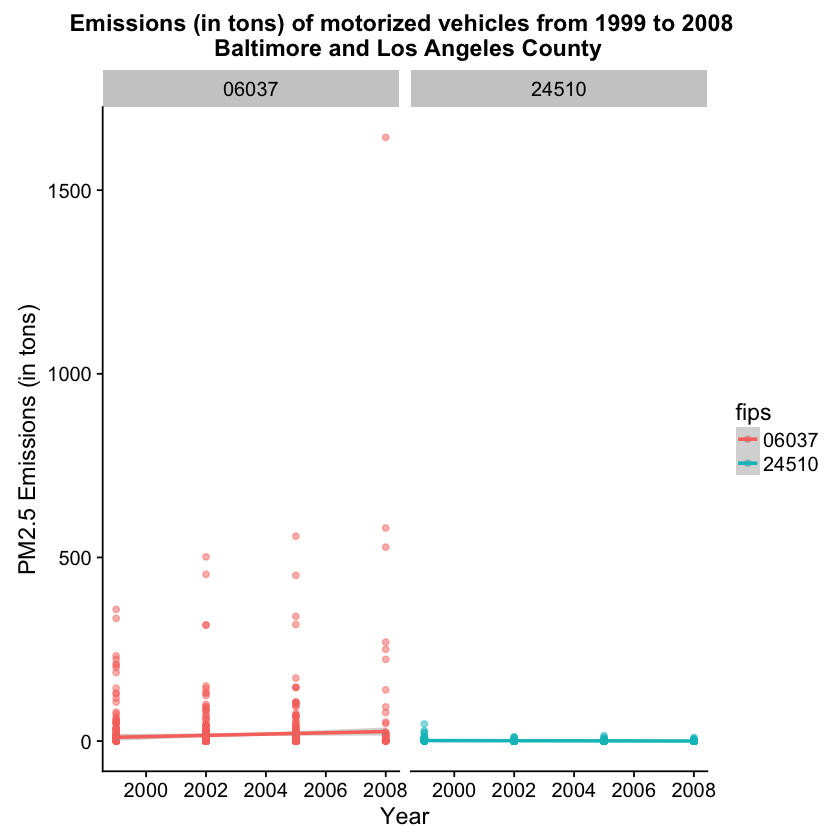

In [363]:
setwd('/Users/lauraochoa/Documents/Coursera/4_exploratorydataanalysis/homework2')

# Read data
NEI <- readRDS('exdata%2Fdata%2FNEI_data/summarySCC_PM25.rds')
SCC <- readRDS('exdata%2Fdata%2FNEI_data/Source_Classification_Code.rds')

# import dplyr to manipulate data
library(dplyr)
NEItab <- tbl_df(NEI)
SCCtab <- tbl_df(SCC)
rm("NEI")
rm("SCC")

# Select Baltimore and LA Data
baltimoreorla <- filter(NEItab, fips == "24510" | fips == "06037")

# Filter the motor vehicle sources and get their SCC codes
motorSCC <- select(filter(SCCtab, SCC.Level.Two == "Highway Vehicles - Diesel" | SCC.Level.Two == "Highway Vehicles - Gasoline"),SCC)

# Get only emissions with those SCC codes of motor vehicles
baltimoreorlamotorNEI <- inner_join(baltimoreorla, motorSCC, by = "SCC")
baltimoreorlamotorNEI_by_year <- group_by(baltimoreorlamotorNEI, year)

# Load ggplot2 and plot emissions of baltimore
library(ggplot2)
par(mfrow=c(2,2))
g <- ggplot(baltimoreorlamotorNEI_by_year, aes(year,Emissions))
g + geom_point(aes(color=fips), alpha=0.5) + geom_smooth(method="lm", aes(color=fips)) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Emissions (in tons) of motorized vehicles from 1999 to 2008 \n Baltimore and Los Angeles County") + facet_grid(.~fips)

# Copy my plot to a PNG file
dev.copy(png, file = "plot6.png", width=480, height=480)

## Close the PNG device!
dev.off()

Warning message:
“Column `SCC` joining character vector and factor, coercing into character vector”

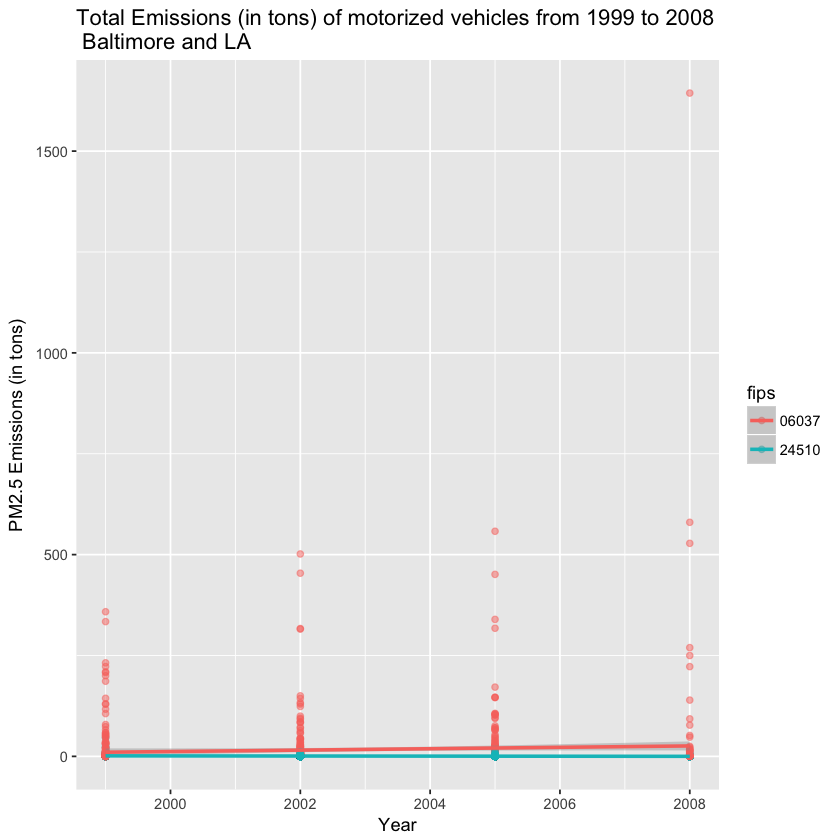

In [279]:
# Select Baltimore and LA Data
baltimore <- filter(NEItab, fips == "24510" | fips == "06037")

# Convert to use dplyr and filter the motor vehicle sources
SCCtab <- tbl_df(SCC)
motorvehicles <- filter(SCCtab, SCC.Level.Two == "Highway Vehicles - Diesel" | SCC.Level.Two == "Highway Vehicles - Gasoline")

# Get SCC codes of motor vehicle sources
motorSCC <- select(filter(motorvehicles, Data.Category == "Onroad"),SCC)

# Get only emissions with those SCC codes of motor vehicles
baltimoremotorNEI <- inner_join(baltimore, motorSCC, by = "SCC")
baltimoremotorNEI_by_year <- group_by(baltimoremotorNEI, year)

# Load ggplot2 and plot emissions of baltimore
library(ggplot2)
par(mfrow=c(2,2))
g <- ggplot(baltimoremotorNEI_by_year, aes(year,Emissions))
g + geom_point(aes(color=fips), alpha=0.5) + geom_smooth(method="lm", aes(color=fips)) + labs(x = "Year", y = "PM2.5 Emissions (in tons)", 
     title="Total Emissions (in tons) of motorized vehicles from 1999 to 2008 \n Baltimore and LA")

# Copy my plot to a PNG file
dev.copy(png, file = "plot6d.png", width=480, height=480)

## Close the PNG device!
dev.off()